# 주제 : 데이터 분석으로 심부전증을 예방할 수 있을까?
----------

## 실습 가이드
1. 데이터를 다운로드 불러옵니다.
1. 코드는 위에서부터 아래로 순서대로 실행합니다.
    
    
## 데이터 소개
1. 이번 주제는 Heart Failure Prediction 데이터셋을 사용합니다.
    
1. 다음 1개의 csv 파일을 사용합니다.
    heart_failure_clinical_records_dataset.csv
    
1. 각 파일의 컬럼은 아래와 같습니다.
    - age: 환자의 나이
    - anaemia: 환자의 빈혈증 여부 (0: 정상, 1: 빈혈)
    - creatinine_phosphokinase: 크레아틴키나제 검사 결과
    - diabetes: 당뇨병 여부 (0: 정상, 1: 당뇨)
    - ejection_fraction: 박출계수 (%)
    - high_blood_pressure: 고혈압 여부 (0: 정상, 1: 고혈압)
    - platelets: 혈소판 수 (kiloplatelets/mL)
    - serum_creatinine: 혈중 크레아틴 레벨 (mg/dL)
    - serum_sodium: 혈중 나트륨 레벨 (mEq/L)
    - sex: 성별 (0: 여성, 1: 남성)
    - smoking: 흡연 여부 (0: 비흡연, 1: 흡연)
    - time: 관찰 기간 (일)
    - DEATH_EVENT: 사망 여부 (0: 생존, 1: 사망)
    
    
    
1. 데이터 URL: https://www.kaggle.com/andrewmvd/heart-failure-clinical-data


---

## Step 0. 의료 데이터셋에 대하여

In [77]:
# 대부분은 의료 데이터가 생소하고 처음일터이다.

### 의료 데이터의 수집
- 의료데이터는 어떻게 '수집' 이 되느냐 부터가 굉장히 중요
- 우리나라는 2020.1월에 새로운 법이 통과!  => 데이터 3법
    - 그중에 가장 핵심은 개인정보에 대한 것
    - 의료정보는 굉장히 민감한 개인정보들이 많기 때문에, 수집이 되더라도,  사람들에게 전파되기 어려운 법적인 특성을 있었습니다.    - '가명정보' 를 사용할수 있게 허용됨.
    - '실명정보' 에서 개인식별 정보를 비식별화 (de-identification) 과정을 거쳐서 만들어진 데이터, 쉽게 말해서 가명정보화 하여 일반적으로 사용할수 있는 데이터화 하여, 이후에 관련분야 민간 연구자들에게도 전달될수 있도록 하여 제공하도록 함 --> 데이터3법을 통해 의료데이터에 생긴 핵심적인 변화.
    - 2020년동안 많은 분들이 '바이오 데이터 분석가' 라든지 '4차 산업 혁명' 에 이어 '바이오 데이터' 관련 된 것들이 뜨기 시작함.  (법적인 배경이 있었던 것이다) 
    - 교육현장, 민간 사업체 등에서 공공데이터로 제공이 됨.
    - 데이터를 생산해서 제공하는 의료기관이라든지, 연구기관들에서 더 인센티브를 주는 방식으로 하여 데이터 생산을 더더욱 독력하는 중.
    - 그리하여 의료데이터 수집이 가속회 되고 있고, 그에 따라 의료데이터를 다룰 인력들에 대한 수요가 점점 늘어나고 있다. 
        - 기본적으로 가공해서 업로딩 하는 데이터 엔지니어
        - 데이터분석, 모델링 활용하는 사람들


In [78]:
# 02':11"

### 의료 데이터 분석의 현재

- 우리나라는 이제 걸음마 단계.  (그동안 법적 제약)
- 그 이전에는 주로 연구 되었던 것들이 의료 영상 같은 것들. MRI, CT (3D 스캔)
    - 병 판명, 등에 사용
- 아직 분석의 결과는 이렇다 할만한게 없다.
- 의료 데이터를 적극 사용해왔던 국가들 
    - 핀란드 : 환자들에게 전자포털 제공, 자신의 데이터를 제공할지 안할지 관리 가능케 함. 인프라 잘 구성됨.
    - 덴마크 : 국가에서 포털 구축, 진료기록 99% 에게 환자 주치의에게 전달됨. 과거 기록들을 통해 더 좋은 진료서비스, 개인 병력, 과거 어떤 치료 진료 내역등이 공유됨.
    - 영국 : 전자 의무 기록 활용 
    - 중국 : 의료 융합 추진, 병원 공실률 down 시켜 의료 인프라 효율적 활용.  특정 병원에 사람이 쏠리지 않도록 함.  국가적으로 컨트롤 함.
    - 미국 : 주로 연구및 연구 발표 활발. 민간단체에서 임상데이터 수집 가능.  연구가능한데이터 많이 취득함.  의료 빅데이터 관련해서만 논문이 100건 이상 나오는 중.
    - 대한민국 : 우리는 이제 걸음마 시작단계, 할일이 많다.  다른 관점에서 보면, 의료 데이터 다루는 것이 국내에선 수요가 계속 늘어날 것이다!  그래서 이 분야 진입은 전망이 좋다.

### Accuracy, Precision, 그리고 Recall
의료 데이터에선 Accuracy, Precision, 그리고 Recall 관계 중요

- Classification 을 해야 하는 상황이다. DEATH_EVENT 가 0, 1  <-- 두가지

- 정답 (실제값 Actual value)
    - True : 실제 죽은 사람
    - False : 실제 안 죽은 사람
    
- 분류결과(예측값 Predicted value)
    - True : 이 사람은 죽었다.
    - False : 이 사람은 안 죽었다

- Confusion Matrix (오차행렬)
    - 데이터분석, 인공지능에서 '성능' 지표 구분
![](https://media.vlpt.us/images/jiselectric/post/ad9ef645-d1da-43b5-b1b6-be42f023ed04/1_Z54JgbS4DUwWSknhDCvNTQ.png)


예측값 Predicted Value <br>
실제값 Actual Value <br>

1. **TP** (True Positive) : 예측값을 Positive 값(1)으로 예측했고, 실제 값도 Positive 값(1)
    - ex) 이 환자의 데이터를 보니 '사망'했다 --> 정말 '사망'한 환자의 데이터였다!<br>
1. **TN** (True Negative) : 예측값을 Negative 값(0)으로 예측했고, 실제 값도 Negative 값(0)
    - ex) 이 환자의 데이터를 보니 '생존'했다 --> 정말 '생존'한 환자의 데이터였다!<br>
1. **FP** (False Positive) : 예측값을 Positive 값(1)으로 예측했는데, 실제 값은 Negative(0)
    - ex) 이 환자의 데이터를 보니 '사망'했다 --> 그런제 '생존'한 환자의 데이터였다!<br>
1. **FN** (False Negative) : 예측값을 Negative 값(0)으로 예측했는데, 실제 값은 Negative(1)
    - ex) 이 환자의 데이터를 보니 '생존'했다 --> 그런제 '사망'한 환자의 데이터였다!<br>

우리가 1000개의 샘플을 가지고 예측한다면 위 4개중에 하나에 속할 것이다.
다 합치면 1000이 될테구.. 가장 BEST 케이스는 TP, TN 의 숫자가 제일 높고,
FP, FN 이 아예 0 이면 가장 좋은 수치겠죠.  (현실적으로는 거의 불가)

- Accuracy (정확도) 는 전체 케이스 중에 '맞게' 한게 몇개냐? 라는 겁니다.
    - (TP + TN) / (TP + TN + FN + FP)
    
- Precision (정밀도) TP 를 얼마나 맞추었느냐? 라는 겁니다  (일단 외우고 보자)
    - TP / (TP + FP)
    - 내가 True 라고 예측했을때 옳을 확률 
    - 적중률 (내가 얼마나 제대로 적중했나?)
    
- Recall (재현률) 
    - TP / (TP + FN)
    - 실제 True 중에서 내가 얼마나 맞추었느냐 라는 겁니다. 


- 의료 데이터는 Precision 과 Recall 중 무엇이 더 중요할까? 
    - Precision : '너 병에 걸렸어!' 라 판단했는데 실제로 병에 걸린 확률
        - 물론 높을수록 좋겠죠
    - 그런데 Recall 이 더 중요하답니다. 왜냐하면, Recall 은 실제 병걸린 사람들이 이만큼 있는데, 그 중에 내가 얼마나 찾아내었느냐 는 겁니다. 


- 의료데이터의 True False 는 여러 단계를 거쳐 검사하게 됩니다.
    - 간단하지만, 정확성이 떨어지는 테스트를 우선 하게 되고
    - 그 다음엔, 복잡하지만, 정확성이 높은  
    
    - 가령 MRI 를 먼저 찍고..  어떠한 가능성을 발견하고, 추가검사를 하게 됨
    - 그리고 추가 검사 들어감.  추가검사를 통해... 또 추가 검사 받고..
    - 실제 조직을 떼어내고 검사함.--> 아! 그 병이 아니었네요 다행입니다. 라고 할수 있겠죠...   
    - 이 과정은 괜찮습니다.  병을 판정하기 위해 첨부터 조직검사를 할수 없습니다.
    - 비교적 간단한것부터 시작하여 좁혀 나가는 겁니다.
    - 이 경우는 Recall 이 좋아야 합니다. 전체 발생 환자 중에 '잘 찾아내는 방법' 이어야 실제 찾아나갈수 있습니다. 
    
    
- 최종적으론 Recall 과 Precision 이 둘다 좋은 비싼 방법을 사용해야 겠죠
    - 그러나 초반에 사용하는 .. (즉 데이터 분석을 통해서 하는) 쉽게 얻을수 있는 것드릉ㄹ 조합해서 하는 경우는 Recall 을 더욱 중시 합니다.  
    
    
- Recall 에 몰빵 하면 Precision 이 0 가 될수도 있다.
    - 무한대의 환자가 왔을때 무조건 '너 병 있어!' 라고 하면 Recall 은 100 에 근접
    - 그러나, Precision 은 0 으로 곤두박질 치는 겁니다.
    - 병없는 사람도 병있다 하는 셈이니..
    - Recall 을 100% 로 만드는 것은 바람직한 것은 아니다.
    - Recall 을 0.9 이상 유지하면서 Precision 을 떨어뜨리지 않는게 가장 중요합니다 
    
    
- 나중에 그려볼 기회가 있겠지만 Precision-Recall plot 이라는게 있다.
![](https://machinelearningmastery.com/wp-content/uploads/2020/01/Precision-Recall-Curve-of-a-Logistic-Regression-Model-and-a-No-Skill-Classifier2.png)
   

## Step 1. 데이터셋 준비하기

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# EDA <- 목적성을 가지고 접근할 필요가 있다.

### 문제 1. Pandas 라이브러리로 csv파일 읽어들이기


In [3]:
# pd.read_csv()로 csv파일 읽어들이기

# datapath = r"D:\DevRoot\DataSet\heart_failure_clinical_records_dataset.csv"
datapath = r'C:\dataset\300제\Part 1 - 머신러닝 분류 모델\Chapter 1 - 데이터 분석으로 심부전증을 예방할 수 있을까_\heart_failure_clinical_records_dataset.csv'

df = pd.read_csv(datapath)
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


## Step 2. EDA 및 데이터 기초 통계 분석


### 문제 4. 데이터프레임의 각 컬럼 분석하기


In [3]:
# 상위 5개
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
# 상위 10개
df.head(10)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
5,90.0,1,47,0,40,1,204000.00,2.1,132,1,1,8,1
6,75.0,1,246,0,15,0,127000.00,1.2,137,1,0,10,1
7,60.0,1,315,1,60,0,454000.00,1.1,131,1,1,10,1
8,65.0,0,157,0,65,0,263358.03,1.5,138,0,0,10,1
9,80.0,1,123,0,35,1,388000.00,9.4,133,1,1,10,1


In [ ]:
# DataFrame에서 제공하는 메소드를 이용하여 컬럼 분석하기 (head(), info(), describe())
# 각 컬럼들이 어떠한 값들, 어떠한 범위를 갖고 있는지 확인




In [ ]:
# 각 컬럼들이 어떠한 값들, 어떠한 범위를 갖고 있는지 흝어보자.

"""
현재 EDA 를 수행하고 있습니다.
데이터들의 숫자드을 쓱 눈으로 보는것 먼저 해봅시다.

age <-- float 처럼 보이지만, 정숫값
anemia (애내미아?)  
age: 환자의 나이
anaemia: 환자의 빈혈증 여부 (0: 정상, 1: 빈혈)
creatinine_phosphokinase: 크레아틴키나제 검사 결과

diabetes: 당뇨병 여부 (0: 정상, 1: 당뇨)
ejection_fraction: 박출계수 (%)   심박이 이루어질때 나오는 피의 비율  0 ~ 100
high_blood_pressure: 고혈압 여부 (0: 정상, 1: 고혈압)
platelets: 혈소판 수 (kiloplatelets/mL)
    단위가 있다. 혈액 몇 mL 당 수치
serum_creatinine: 혈중 크레아틴 레벨 (mg/dL)
    
serum_sodium: 혈중 나트륨 레벨 (mEq/L)
sex: 성별 (0: 여성, 1: 남성)
smoking: 흡연 여부 (0: 비흡연, 1: 흡연)
time: 관찰 기간 (일)
DEATH_EVENT: 사망 여부 (0: 생존, 1: 사망)


각 컬럼들이 

"""
None

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


#### 결측치(missing value)  및 타입 확인

In [7]:
"""
info() 중요하다
특히 Non-Null 개수와 Dtype !!
지금은 총 299개의 ROW가 있고 인덱스 0 ~ 298
Non-null 이 '전부' 299   : 결측치(missing value) 확인

총 3개의 float 와 10개의 int로 되어 있슴.

간혹 데이터 타입이 잘 정의 되어 있지 않은 경우 object (파이썬 객체)로 되어 있는 경우가 있다. 
그런 경우에는 데이터 타입을 변환해주어야 하는 전처리를 해주어야 할때도 있습니다.
지금은 그렇게 하지 않아도 될만큼 깔끔하게 정리되어 있다. 
매우 깔끔(클린)한 데이터 셋이다! 

비록 dtype 은 int 타입이나 '분류형'으로 보아야 하는 데이터들이 있다.
ex) DEATH_EVENT, smoking, sex, anaemia, diabetes, high_blood_pressure

"""
None

In [8]:
df.describe()  # 기술통계량 (수치형 데이터에 대한 기술통계량)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [ ]:
# count, mean std, min 
# 25% 하위 4분위값, 50% 중앙값  75% 상위 4분위값 

# age : 40세 ~ 95세 .  중앙값은 60 ,  평균도 60.83..   나머지 값도 확인 가능



#### balanced vs imbalanced data 여부 등 확인

In [10]:
# 여기서 볼 데이터는 
# anameia :    0 ~ 1 의 범위인데, 평균이 약 0.43 (0.5에 가까운 값)  
# diabetes, high_blood_pressure, sex, smoking, DEATH_EVENT
#  이 정도면 심한 imbalanced data 라 볼수 없어요

# 0 ~ 1 사잇값들의 평균이기에 정확히 0.5 이면 1:1 인거구요.
# 0 혹은 1 로 몰려 있을수록 평균이 한쪽으로 치우치겠죠.

# 지금은 그렇게 심하지 않습니다. 
# DEATH_EVENT 가 가장 심한데.. 0.32107
#  약 1/3 이 사망, 2/3 이 생존한 분들의 데이터다.

![](https://miro.medium.com/max/450/1*zsyN08VVrgHbAEdvv27Pyw.png)

#### 이상치 (outlier)
이상치 (Outlier)란 관측된 데이터의 범위에서 많이 벗어나 아주 작은 값이나 아주 큰 값
![](https://t1.daumcdn.net/cfile/tistory/9951C8475C518F180B)

#### 이상치와 박스플롯 (box plot)
![](https://wikidocs.net/images/page/33920/Rplot19.png)
![](https://mblogthumb-phinf.pstatic.net/MjAxOTAzMDZfMjUz/MDAxNTUxODgzOTE4Mjgy.O4NTMQ3OpXjpJ6yoxWwXxyA_yzD6Hk2WlmVhXxVeieQg.04WzOuL6S3Lf5Bv5lrWDb3F9XEZPUxDpszfYw5yIMyMg.PNG.pmw9440/7.2_%EC%9D%B4%EC%83%81%EC%B9%98.png?type=w800)

이상치 탐색을 위해 **박스플롯**으로 시각화하곤 합니다. 박스플롯은 다음과 같은 원리로 그려집니다.


박스플롯은 분위수를 기준으로 그려집니다.<br>
상자 안에 그려져 있는 직선은 중위수(Median)을 나타냅니다.<br>
상자의 밑변은 1분위수를 나타내며, 윗변은 3분위수를 나타냅니다.<br>
상자를 중심으로 위 아래에, 직선이 있는 것을 볼 수 있습니다. <br>

이 직선은 울타리라고 부릅니다.<br>
상자로부터 아래 직선의 계산식 : Q1 - 1.5 * (Q3 - Q1)<br>
상자로부터 위 직선의 계산식 : Q3 + 1.5 *(Q3 - Q1)<br>
이 울타리를 벗어난 값들을 Outlier라고 부릅니다.<br>


Outlier는 기본적으로 통계추정에 있어서 방해가 되고는 합니다.<br>
통계분석은 전부 귀납법인데, 이상치같은 특수 케이스가 규칙을 만드는데 방해가 되기 때문입니다.<br>

#### Outlier의 처리방법

1. 제거를 하는 방법  (단점: 데이터가 버려진다)

2. 데이터 변형을 통해 Outlier문제를 줄여줍니다.

    - 통계추정에세는 정규분포를 맞추어 주는 것이 매우 중요합니다. 보통 Outlier로 인해 한 쪽으로 치우친 분포는 log 변환을 통해 정규성을 맞추어주고는 합니다.

참조 https://wikidocs.net/33920

참조 https://m.blog.naver.com/pmw9440/221481052587

In [12]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [13]:
"""
숫자로만 보면 알기 어려운 것들이 있다.  
그래도 확인해볼수 있는 것들은
max, min 값이 과도하게 크거나 작은 것들

예를 들어 creatinine_phosphokinase 의 경우
min 값이 23 d이고 중앙값이 250 인데... max  값이 7861 이다!?!?
앞의 것들 min ~ 75% 의 증가세에 비하면 max 값이 상당히 큰 값이다. 상당한 outlier  에 해당한다 볼수 있다.
 상위 몇개 데이터는 배제해볼 필요성도 있겠구나.. 라고  생각해볼수 잇습니다.

ejection_fraction : 크게 문제 없어 보인다
platelets(혈소판 수치) : 크게 문제 없어 보인다  . 증가세가 일정한 느낌
serum_sodium : 크게 문제 없어 보인다.  그러나 값의 범위가 좁은 느김
                   평균이 136  인데... std 가 4.4. 정도밖에 안된다.  
                   
time : 최소 4일 최대 285일 관찰 ..   285일이면 약 9개월 정도 관찰.
      나중에 time 과 DEATH_EVENT 의 관계를 보면 될거 같다.
      사망을 하게 되면 관찰이 멈출테니까..  상당히  correlate 된 데이터라 볼수 있을듯.
      잠시후에 다시 이야기 하도록 하죠.
"""
None




In [14]:
# 지금까지 읽어온 데이터 함 뿌려보고 통계화된 데이터 보았습니다
# 이번에는 시각화 하여 보도록 합니다

# 숫자들만 보았을때는 보이지 않는것을 시각화를 통해

### 문제 5. 수치형 데이터의 히스토그램 그리기


<AxesSubplot:xlabel='age', ylabel='Count'>

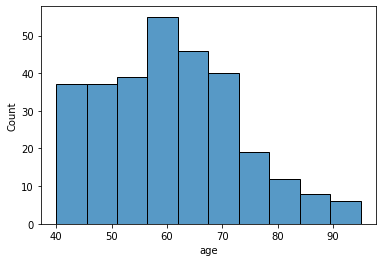

In [15]:
# seaborn의 histplot, jointplot, pairplot을 이용해 히스토그램 그리기

sns.histplot(x = 'age', data=df)

In [17]:
"""
60 ~ 70 정도의 평균,  long tail 형태의 데이터 
좌측으로는 좀 뭉쳐있고, 젊은층 데이터는 없이 40대 이상 90대 의 long tail 수치형 데이터
"""
None

<AxesSubplot:xlabel='age', ylabel='Count'>

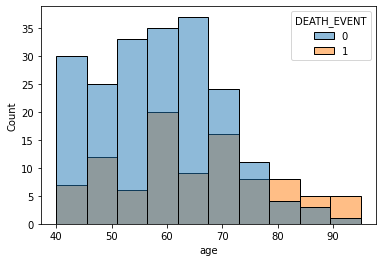

In [19]:
# hue 라는 '강력한' 입력을 넣어주시면 재미있는 것들을 관찰할수 있습니다.

sns.histplot(x = 'age', data=df, hue='DEATH_EVENT')

# DEATH EVENT 가 0 / 1 두개의 값을 가지기에 두개의 색으로 쪼개어져 나온다
# 두개의 히스토그램이 '겹쳐' 있는 겁니다. (겹친부분이 회색) 쌓인(stack) 형태가 아닙니다
#   사망하신 분들이 나이대별로 고루 분포되어 있다.  

# 사망하지 않은 분들은 나이가 젊은 쪽에 몰려 있슴을 확인할수 있다
# 여기에 좀더 통계적으로 보려면 kde=True 를 주면 됩니다

<AxesSubplot:xlabel='age', ylabel='Count'>

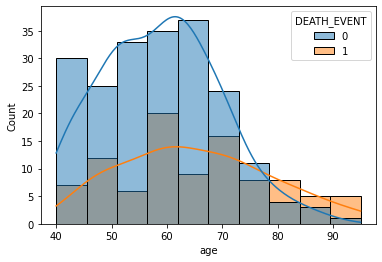

In [20]:
# kde : kernel density estimate : 좀더 부드러운 곡선으로  (kde 플롯까지 같이 보여줌)
sns.histplot(x = 'age', data=df, hue='DEATH_EVENT', kde=True)

In [22]:
"""
상당히 범위가 많이 겹쳐 있기 때문에
age 가 DEATH_EVENT 를 가르는데에는 크게 유용하진 않을거 같습니다.
"""
None 

# 함 다른것도 관찰해보겠습니다.

In [23]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

<AxesSubplot:xlabel='creatinine_phosphokinase', ylabel='Count'>

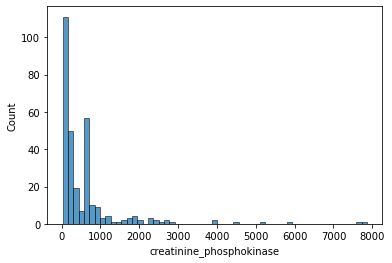

In [25]:
sns.histplot(x = 'creatinine_phosphokinase', data=df)

In [28]:
"""
아까 전에 보았듯이 OUTLIER 가 굉장히 많습니다.
그래서 histogram 으로 유용한 데이터를 얻기가 현재로선 쉽지 않습니다.

outlier 를 배제를 하고 보도록 하겠습니다. 3000 이상은 떼고 보고 싶다면
"""
None

<AxesSubplot:xlabel='creatinine_phosphokinase', ylabel='Count'>

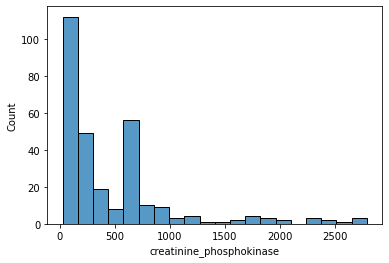

In [37]:
sns.histplot(x = 'creatinine_phosphokinase', data=df.loc[df['creatinine_phosphokinase'] < 3000])

<AxesSubplot:xlabel='creatinine_phosphokinase', ylabel='Count'>

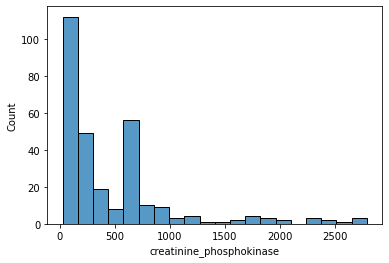

In [32]:
# x가  없으면 아래와 같이 해도 되구..
sns.histplot(data=df.loc[df['creatinine_phosphokinase'] < 3000, 'creatinine_phosphokinase'])

In [33]:
"""
이렇게 보아도 히스토그램에서 정보를 얻기가 쉽지 않아 보입니다.
이 정보는 유용하지 않을 가능성이 높습니다.   '통계적인 특징' 이 잘 드러나지 않습니다.

"""
None

# 다음은 ejection_fraction 을 봅시다

In [34]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

<AxesSubplot:xlabel='ejection_fraction', ylabel='Count'>

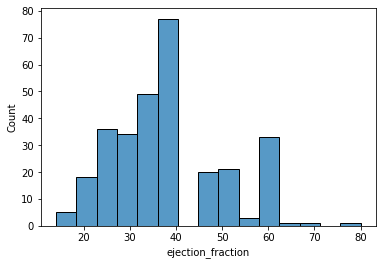

In [35]:
sns.histplot(x='ejection_fraction', data=df)

In [40]:
"""
위에서 비어 있는 부분이 보입니다.
실제 데이터가 없는게 아니라...  bins 를 조절 해주면 됩니다  (디폴트 bins='auto')

bins 가 너무 과도하게 쪼개져 있어서리..
"""
None

<AxesSubplot:xlabel='ejection_fraction', ylabel='Count'>

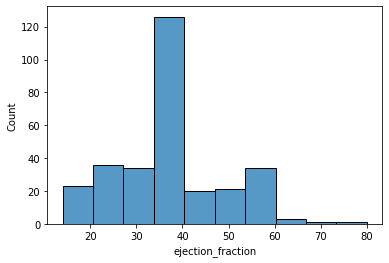

In [44]:
sns.histplot(x='ejection_fraction', data=df, bins=10)  # bins 를 좀 줄입니다

# 너무 줄인거 같네요

<AxesSubplot:xlabel='ejection_fraction', ylabel='Count'>

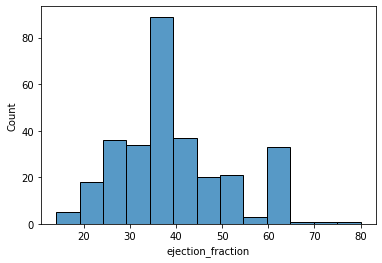

In [45]:
sns.histplot(x='ejection_fraction', data=df, bins=13)

# 어느 정도 합리적인 데이터가 나온듯 합니다

In [46]:
"""
두군데 peak 가 있는 데이터

여기에 hue 를 적용해보겠습니다.
"""
None

<AxesSubplot:xlabel='ejection_fraction', ylabel='Count'>

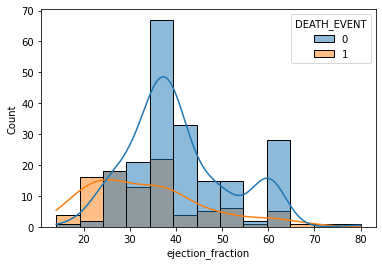

In [47]:
sns.histplot(x='ejection_fraction', data=df, bins=13, hue="DEATH_EVENT", kde=True)

In [49]:
"""
ejection_fraction 이 낮은 사람들이 사망을 많이 한것으로 확인할수 있습니다.
높으신 분들은  상대적으로 덜 사망하는것을 확인 가능

비율의 차이는 상당히 크긴 하지만, 
사망자 수 자체는 20 ~ 50 구간에 상당히 분포해 있다. 

생존자를 걸러내는데에는 상당히 도움이 될거 같지만, precision 을 가져가는데에는 도움이 되겠지만
recall 을 높이는데에는 크게 도움이 안될수 있습니다. 

히스토그램을 보면서 우리가 어느정도 예측을 할수 있는 겁니다.

"""

# 다음은 혈소판을 보겠습니다
None

In [50]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

<AxesSubplot:xlabel='platelets', ylabel='Count'>

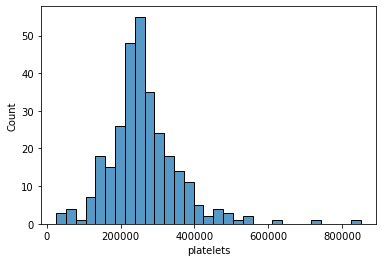

In [51]:
sns.histplot(x = 'platelets', data=df)

In [53]:
"""
혈소판 수치는 통계적으로 적절해 보입니다.

hue 도 보도록 합시다
"""
None

<AxesSubplot:xlabel='platelets', ylabel='Count'>

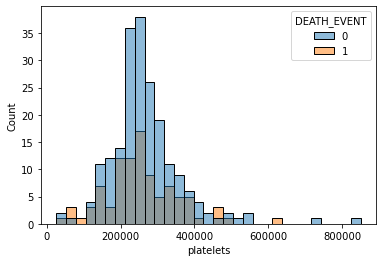

In [54]:
sns.histplot(x = 'platelets', data=df, hue='DEATH_EVENT')

In [55]:
"""
이거는 굉장히 도움이 안될거 같다.
DEATH_EVENT 와는 거의 상관이 없어 보입니다.

'상관' 은 나중에 다시 보도록 할겁니다
"""
None

# 그러면 jointplot 도 함 볼까요?

In [56]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

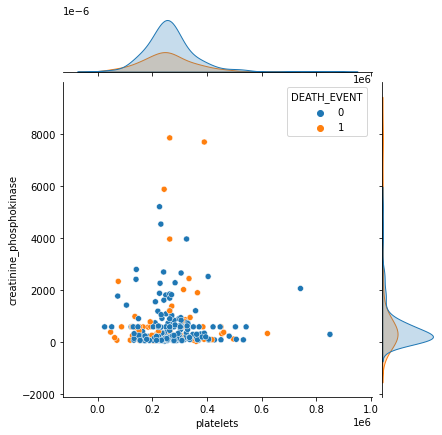

In [57]:
sns.jointplot(x='platelets', y='creatinine_phosphokinase', hue="DEATH_EVENT", data=df)

In [58]:
"""
jointplot 은
상단과 우측에 히스토그램과 kde 플롯을 같이 각각보여줍니다.
그리고 두개의 joint scatter plot 을 보여줍니다
두개 (x, y축) 에 점을 각각 찍고요. DEATH_EVENT 에 따라서 색을 다르게 칠해줍니다

밑에 많이 뭉쳐 있어서 판단하기 어렵습니다.

이렇게 뭉쳐 있을때는 alpha 값을 주면 좋습니다.

"""
None

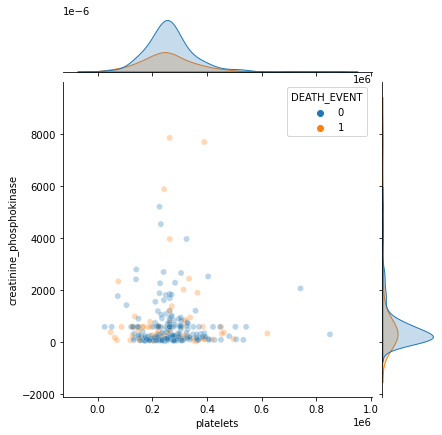

In [59]:
sns.jointplot(x='platelets', y='creatinine_phosphokinase', hue="DEATH_EVENT", data=df, alpha=0.3)

In [ ]:
"""
alpha 를 주면 점을 투명하게 찍어주기 때문에
진해지는 정도로 겹쳐있는 것을 확인할수 있습니다.

그런데, 뭉쳐 있는게 어쨌든 잘 가르는데는 도움이 되지 않습니다.
"""
None

In [60]:
# 지금까지는 수치형 데이터를 보아왔습니다.

# 이번에는 boxplot 을 통해서 범주별 통계를 확인해보겠습니다



### 문제 6. Boxplot 계열을 이용하여 범주별 통계 확인하기


In [61]:
# seaborn의 Boxplot 계열(boxplot(), violinplot(), swarmplot())을 사용
# Hint) hue 키워드를 사용하여 범주 세분화 가능


# 범주형 데이터는 위 히스토그램 데이터를 볼수 있는 것과 달리
# boxplot 은 범주별로 따로 통계를 내야 어느정도 확인을 할수 있다.


<AxesSubplot:xlabel='DEATH_EVENT', ylabel='ejection_fraction'>

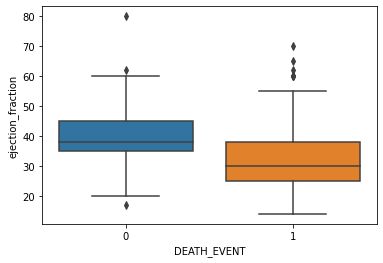

In [65]:
# DEATH_EVENT 에 대해 ejection_fraction 값을 boxplot 으로 보도록 하겠습니다.
sns.boxplot(x="DEATH_EVENT", y='ejection_fraction', data=df)

In [ ]:
"""
DEATH_EVENT !  생존(0)이냐? 사망(1)이냐? 에 따른 ejection_fration 을 boxplot 을 본겁니다.

- 일단 평균에서 어느정도 차이가 난다 
- 전체적인 값의 범위의 차이도 확인 가능

boxplot 의 최대 장점은 outlier 를 바깥으로 빼줍니다.  두개(범주)의 통계수치를 간단하게 비교할수 있다는 점입니다.

히스토그램으로 보았을때는 위의 ↓ 과 비슷한 급의 정보다.
    sns.histplot(x='ejection_fraction', data=df, bins=13, hue="DEATH_EVENT", kde=True) 
히스토그램은 '겹쳐져' 보이기 때문에 많은 정보를 '한번에' 파악하기 어려웠다면
boxplot 을 이용할때는 일목요연하게 비교를 할수가 있다. 

boxplot은 '경영층' 에서 많이 사용하는 통계수치 입니다.  
여러분이 경영층과 이야기 할때는 이와 같은 boxplot 을 이용해서 프레젠테이션 하면, 경영층에서
더 쉽게 받아들일수 있는 중요한 그래프라고 볼수 있습니다.

"""

<AxesSubplot:xlabel='ejection_fraction', ylabel='Count'>

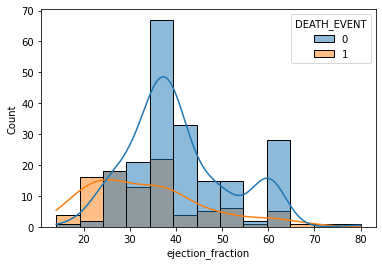

In [66]:
sns.histplot(x='ejection_fraction', data=df, bins=13, hue="DEATH_EVENT", kde=True)

In [67]:
# 박스 플롯을 하나 더 그려보겠습니다

In [68]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

<AxesSubplot:xlabel='smoking', ylabel='ejection_fraction'>

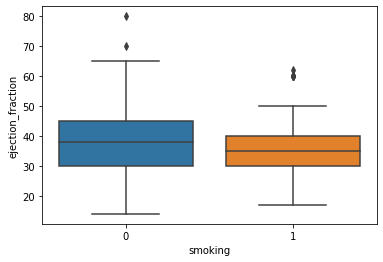

In [69]:
# smoking 여부에따른 ejection_fraction 을 함 보도록 할까요?
sns.boxplot(x = 'smoking', y='ejection_fraction', data=df)

In [ ]:
"""
 smoking 여부에따른 ejection_fraction .. 어느정도 차이가 있슴을 알수 있습니다.
 - 평균은 큰 차이가 없는데
 - 흡연하시는 분들(1) 이 ejection_fraction 값이 좁은 것을 확인할수 있습니다.
 
"""
None

In [70]:
# boxplot 에 이어 violin plot 을 함 보도록 하겠습니다

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='ejection_fraction'>

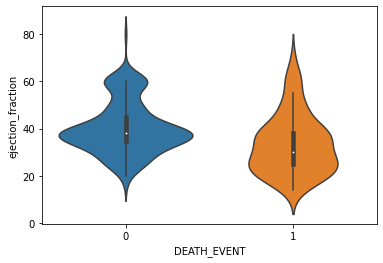

In [71]:
# violinplot 은 boxplot 의 varication 이라 볼수 있습니다

# 아까 전의 sns.boxplot(x="DEATH_EVENT", y='ejection_fraction', data=df) 
# 과 동일하게 violinplot 으로 보겠습니다

sns.violinplot(x="DEATH_EVENT", y='ejection_fraction', data=df)


In [72]:
"""
boxplot 에 표시되었었던 내용이 안쪽으로 표시됩니다.
- 평균이 다르다.
- 기본적인 '갑의 범위' 의 차이 
- 좌우로 퍼진 모습은 히스토그램이라 보시면 됨

히스토그램 + boxplot 을 하나로 묶어서 표현하는게 violin plot .
outlier  까지 표현됨.  (좌측 0 의 끝 상단.. )

좀더 다양+많은 데이터를 '한번에' 시각화를 할수 있습니다.

참고로 violin plot 은 아주 많이 사용되는 plot 방식은 아닙니다.

일반적으로 경영층에서 활용하는 plot 이 아니라는 뜻입니다.

'분석' 단계에서 자세히 데이터를 들여다 볼때는 활용해도
'보고' 할때는 차라리 boxplot 이 좋습니다.

"""
None



<AxesSubplot:xlabel='DEATH_EVENT', ylabel='ejection_fraction'>

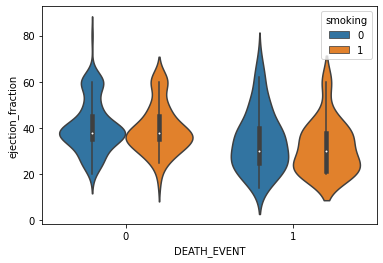

In [74]:
# smoking 을 hue 로 추가
sns.violinplot(x="DEATH_EVENT", y='ejection_fraction', data=df, hue='smoking')

In [ ]:
"""
smoking 에 따라서 (0 or 1) x DEATH_EVENT 에 따라서 (0 or 1) => 총 4가지로 표현됨.
"""

In [73]:
# 이를 극단적으로 하는 Swam plot 을 보겠습니다
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 9.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='DEATH_EVENT', ylabel='platelets'>

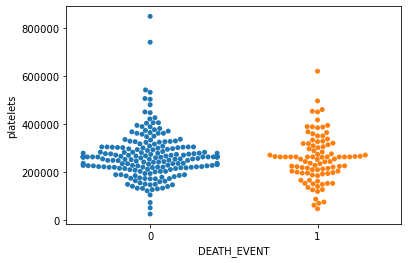

In [75]:
# swarmplot 은 violinplot 에서 한단계 더 나아가는 plot 입니다.
sns.swarmplot(x="DEATH_EVENT", y='platelets', data=df)

In [ ]:
"""
swamplot 은 데이터 일정개수가 있으면 그것을 점으로 표기해주는 방식. 
scatter + violin plot 을 합쳐놓은 형식이라 볼수 있습니다.
모양은 violin 과 비슷하게 드러나고.

시각적으로는 유용하게 비교해볼수 있다.
그러나, boxplot 같은 통계 정보는 들어가 있지 않아서 통계정보를 한번에 보기는 어렵다 

여기에 hue 가 들어가면 강력합니다.
"""
None

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 9.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='DEATH_EVENT', ylabel='platelets'>

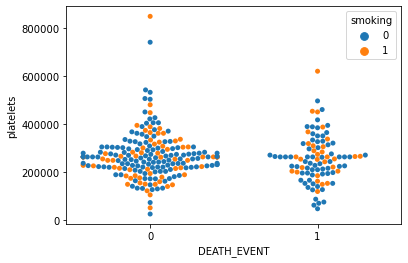

In [76]:
sns.swarmplot(x="DEATH_EVENT", y='platelets', data=df, hue='smoking')

In [ ]:
"""
각 DEATH_EVENT 마다의 smoking 여부를 이렇게 나누어 준다.  
시각적으로 얼마만큼을 구성하고 있는지를 한눈에 볼수 있게 해준다.
매우 유용한 표기 방법입니다.

만약 여기서 smoking 이 위아래로 확실히 구분된다면, 시각적으로 확 구분되어 보이겠죠.

swarmplot 도 굉장히 유용하게 사용할수 있습니다.
"""
None

In [ ]:
# 여기까지 대표적인 정보의  EDA 를 해보았습니다
# 데이터가 잘 갈라지는 데이터가 아니라서
# EDA를 통해서 숫자들은 어느정도 인사이트를 얻을수 있었지만
# 시각적으로는 많은 인사이트를 얻진 못한 데이터 였습니다.

# 데이터 하나하나만 가지고는 유용한 정보를 얻긴 쉽지 않을수 있습니다.

### countplot 을 사용하여  범주형 통계 확인하기

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='count'>

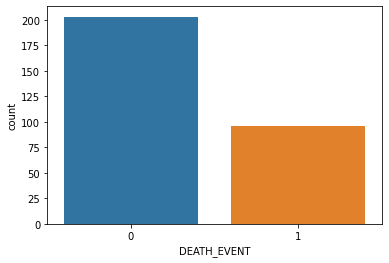

In [53]:
sns.countplot(x='DEATH_EVENT', data=df)

In [54]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [55]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


<AxesSubplot:xlabel='sex', ylabel='count'>

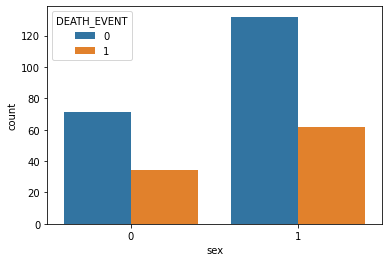

In [57]:
sns.countplot(x='sex', data=df, hue="DEATH_EVENT")
# 0: 여성, 1: 남성

In [59]:
df['age']

0      75.0
1      55.0
2      65.0
3      50.0
4      65.0
       ... 
294    62.0
295    55.0
296    45.0
297    45.0
298    50.0
Name: age, Length: 299, dtype: float64

### 나이대 (age_span) 컬럼을 새로 추가
기존의 컬럼등을 사용하여 새로운 컬럼 데이터를 만든뒤 이를 분석에 활용할수 있다.

In [4]:
df['age_span'] = (df['age'] / 10).astype(int) * 10

In [6]:
df
# 끝네 age_span 컬럼이 생긴것을 확인해보자

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,age_span
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1,70
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1,50
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1,60
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1,50
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0,60
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0,50
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0,40
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0,40


In [7]:
df.groupby('age_span').size()

age_span
40    47
50    82
60    93
70    52
80    19
90     6
dtype: int64

In [10]:
# age_span 을 사용하여 나이대별 평균도 계산할수 있다.
df.groupby('age_span').mean()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age_span,,,,,,,,,,,,,
40,44.212766,0.297872,802.148936,0.446809,37.191489,0.297872,285931.705319,1.130213,136.425532,0.574468,0.234043,148.425532,0.234043
50,53.329268,0.451220,620.658537,0.402439,37.353659,0.317073,265001.807073,1.266951,137.134146,0.682927,0.353659,144.048780,0.243902
60,62.949828,0.505376,499.215054,0.526882,38.473118,0.311828,248990.840645,1.496344,136.419355,0.623656,0.311828,125.086022,0.290323
70,72.307692,0.365385,379.250000,0.288462,38.538462,0.557692,267036.349038,1.393462,136.692308,0.653846,0.365385,128.480769,0.384615
80,82.631579,0.368421,932.526316,0.263158,39.894737,0.210526,252248.213684,2.068947,136.052632,0.789474,0.368421,76.368421,0.684211
90,92.333333,0.833333,251.500000,0.333333,39.333333,0.500000,290059.671667,1.471667,135.666667,0.666667,0.166667,65.833333,0.833333


In [69]:
df.groupby('age_span').count()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age_span,,,,,,,,,,,,,
40,47,47,47,47,47,47,47,47,47,47,47,47,47
50,82,82,82,82,82,82,82,82,82,82,82,82,82
60,93,93,93,93,93,93,93,93,93,93,93,93,93
70,52,52,52,52,52,52,52,52,52,52,52,52,52
80,19,19,19,19,19,19,19,19,19,19,19,19,19
90,6,6,6,6,6,6,6,6,6,6,6,6,6


In [11]:
# 나이대별 사망자 수 계산하기
ab = df.groupby('age_span').sum()['DEATH_EVENT']
ab

age_span
40    11
50    20
60    27
70    20
80    13
90     5
Name: DEATH_EVENT, dtype: int64

<BarContainer object of 6 artists>

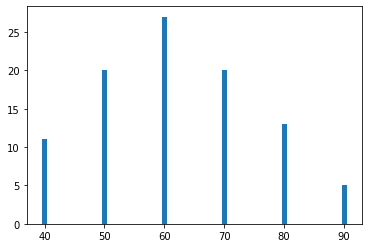

In [74]:
plt.bar(ab.index, ab)

In [13]:
# 내림차순, 혹은 오름차순으로 도 가능
df2 = pd.DataFrame(ab)
df2

,DEATH_EVENT
age_span,
40,11
50,20
60,27
70,20
80,13
90,5


In [14]:
df2.sort_values(by='DEATH_EVENT')  # 정렬할 컬럼 명시,  기본 오름차순

,DEATH_EVENT
age_span,
90,5
40,11
80,13
50,20
70,20
60,27


In [15]:
df2.sort_values(by='DEATH_EVENT', ascending=False)  # 내림차순

,DEATH_EVENT
age_span,
60,27
50,20
70,20
80,13
40,11
90,5


<AxesSubplot:xlabel='age_span'>

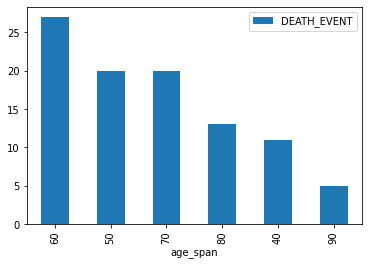

In [22]:
df2.sort_values(by='DEATH_EVENT', ascending=False).plot(kind="bar")

In [23]:
# ↑ 이상으로 '새로운 컬럼(변수, feature)' 를 부여하여 데이터 분석및 머신러닝에 활용할수 있다
# 데이터 관련 작업에서 많이 하는 과정이다!


In [75]:
# pairplot 은 모든 수치형데이터에 대한 조합을 jointplot 으로 한번에 보여줌

In [78]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT', 'age_span'],
      dtype='object')

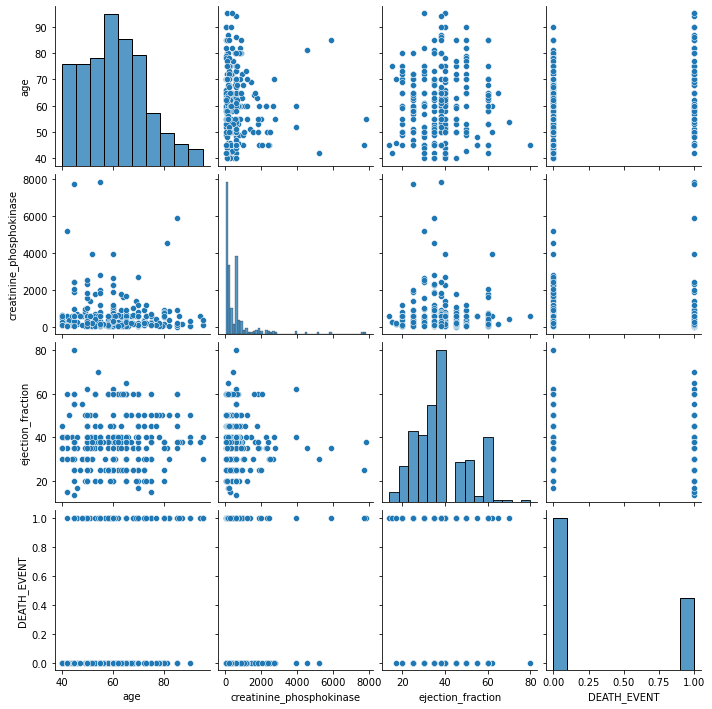

In [79]:
sns.pairplot(df[['age', 'creatinine_phosphokinase', 'ejection_fraction', 'DEATH_EVENT']])
# plt.savefig('test.png', dpi=200)

## Step 3. 모델 학습을 위한 데이터 전처리


### 문제 7. StandardScaler를 이용하여 데이터 전처리하기


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
# 수치형 입력 데이터, 범주형 입력 데이터, 출력 데이터로 구분하기
X_num = 
X_cat = 
y = 

In [ ]:
# 수치형 입력 데이터를 전처리하고 입력 데이터 통합하기
scaler =
X = 

### 문제 8. 학습데이터와 테스트데이터 분리하기


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# train_test_split() 함수로 학습 데이터와 테스트 데이터 분리하기
X_train, X_test, y_train, y_test = 

## Step 4. Classification 모델 학습하기


### 문제 9. Logistic Regression 모델 생성/학습하기


In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
# LogisticRegression 모델 생성/학습
model_lr = 




### 문제 10. 모델 학습 결과 평가하기


In [ ]:
from sklearn.metrics import classification_report

In [ ]:
# Predict를 수행하고 classification_report() 결과 출력하기
pred = 




### 문제 11. XGBoost 모델 생성/학습하기


In [ ]:
from xgboost import XGBClassifier

In [ ]:
# XGBClassifier 모델 생성/학습
model_xgb = 




### 문제 12. 모델 학습 결과 평가하기


In [ ]:
# Predict를 수행하고 classification_report() 결과 출력하기
pred = 




### 문제 13. 특징의 중요도 확인하기


In [ ]:
# XGBClassifier 모델의 feature_importances_를 이용하여 중요도 plot





## Step5 모델 학습 결과 심화 분석하기


### 문제 14. Precision-Recall 커브 확인하기

In [ ]:
from sklearn.metrics import plot_precision_recall_curve

In [ ]:
# 두 모델의 Precision-Recall 커브를 한번에 그리기 (힌트: fig.gca()로 ax를 반환받아 사용)





### 문제 15. ROC 커브 확인하기

In [ ]:
from sklearn.metrics import plot_roc_curve

In [ ]:
# 두 모델의 ROC 커브를 한번에 그리기 (힌트: fig.gca()로 ax를 반환받아 사용)



